In [1]:
import math

# Link Budget

Mach 30 is designing a radio to receive transmissions from satellites (a ground station), named Ground Sphere. One of the most crucial calculations for determining whether the ground station's design will be able to receive the signals transmitted by a given satellite is the link budget. Simply put, a link budget factors in all gains and losses in the system composed of the transmitter (satellite), receiver (ground station), and everything in between.

The calculations themselves are implemented by a python class named test_link_budget.py. The class models what are generally the most significant factors in calculating a link budget. Because there are many factors that are difficult or impossible to accurately factor in, such as the amount of noise a tropical storm may introduce into the system, several aspects of the budget are averages or otherwise estimated values.

## Overview

This particular link analysis uses certain inputs to calculate the Link Margin. These inputs are described in the table below. Please take note that for the equations to work, losses will be negative numbers, while gains are positive numbers.

| Input | Units |Symbols|
|---|---|-----:|
|Ground Station Altitude| m | $${A}_{GS}$$ |
|Satellite Orbital Altitude| km | $${A}_{SAT}$$ |
|Orbit Elevation Angle| deg | $${El}$$ |
|Downlink Frequency| MHz |$${f}$$ |
|Target Energy per Bit to Noise Power Ratio | dB |$${Eb}/{No_T}$$ |
|Implementation Loss of Transmitter | dB | $${L_{TrImp}}$$| 
|Transmit Power | W |$${P_{Tr}}$$ | 
|Transmit Losses | dB |$${L_{Tr}}$$| 
|Transmit Antenna Gain | dB |$${G_{Tr}}$$ |  
|Transmit Pointing Loss | dB |$${L_{TrP}}$$ |
|Polarization Losses | dB | $${L_{Pol}}$$| 
|Atmospheric Loss | dB |$${L_{At}}$$ |
|Receiver Antenna Gain | dB |$${G_{Re}}$$ | 
|Receiver Pointing Loss | dB |$${L_{ReP}}$$ | 
|System Noise Figure | dB |$${N_{Sys}}$$ | 
|Noise Bandwidth | kHz|$${BW}$$|

|Other Variables |Units|Symbols| 
|---|---|--:|
|Wavelength| m |$${\lambda}$$ |
|Link Distance | km |$${D}$$ | 
|Required Eb/No|dB |$${{Eb/No}_R}$$ |
|Converted Transmit Power| dBm |$${P_{TrC}}$$ |
|Transmit EIRP| dB |$${EIRP}$$ |
|Downlink Path Loss| dB |$${L_{Path}}$$ |
|Received Power|dBm|$${P_{Re}}$$|
|Minimum Detectable Signal | dBm | $${MDS}$$| 
|Final Eb/No| dB | $${Eb/No}_{F}$$| 
|Link Margin | dB | $${Link_{Mar}}$$| 

The equation used will be Link Margin = Actual Eb/No - Required Eb/No, where Required Eb/No = Target Eb/No + Implementation Losses and Actual Eb/No = Received Power - MDS. The target Eb/No and the Implementation Losses are usually assumed based on previous experience and research. The Received Power = Transmit EIRP + Downlink Path Loss + Polarization Loss + Atmosphere Loss + Receive Antenna Gain + Receiver Pointing Losses, and the MDS = -174 + 10log(Noise Bandwidth * 1000) + System Noise Figure. Some of these numbers are inputs while others are derived from the inputs. How to derive these values is explained below. 

*<p style="text-align: center;"><b>Equations Listed in the Order Mentioned</b></p>*

$$Link_{Mar} [dB] = {{Eb/No}_F} [dB] - {{Eb/No}_R} [dB]$$

$$ {Eb/No}_F [dB] = {P_{Re}}[dBm] -{MDS}[dBm]$$

$${Eb/No}_R [dB] = {Eb/No}_T[dB] + {L_{TrImp}} [dB]$$

$$P_{Re} [dBm] = {EIRP}[dB] + L_{Path}[dB] + L_{Pol} [dB]+ L_{At} [dB]+ G_{Re}[dB] + L_{ReP}[dB]$$

$$MDS[dB] = -174 + 10log_{10}(BW[kHz]*1000) + N_{Sys}[dB]$$

## Downlink

The Downlink Wavelength = The Speed of Light / Downlink Frequency. The Target Eb/No and Implementation Loss, as well as the Required Eb/No are found through research based on your particular transmission and educated assumptions. The Implementation Loss is loss due to deviation of a real system from a theoretically perfect system. This typically assumed to be around 1 dB.


$$ \lambda [m] = c/f$$

$$ Eb/No_R [dB]= L_{Imp}[dB] + Eb/No_T[dB] $$


## Transmitter

Whenever information is sent from one place to another, such as when a satellite transmits an image down to Earth to be received by a radio on the ground (ground station), the power of the signal being transmitted from the satellite is a critical factor in how well it will be able to be received by the ground station. This section of the document serves as a guide to determining what the gain of the source of the transmission may be. In some cases, the gain may be known, but in other cases it must be estimated based on knowledge of the components of the radio system used to transmit.

In the event that you do not know what the gain of the transmitter is, there are a few methods one might use to determine it. Some satellites have their broadcast frequency publicly available, such as with the NOAA satellites. This may be on the organization's website, but a great source is the Earth Observation Portal's Satellite Mission Database, which contains detailed information about a wide number of satellites, all in one place.

If you cannot access this information, you may have to make some estimates based upon known equipment of the transmitter, or simply make a guess for the purposes of calculating your link budget. If you're attempting to calculate an estimate, knowing what the gain of the antenna, radio, and amplifier are is helpful, where you may then be able to use a conservative estimate for the loss of other components in the system. This estimate may be 1.0dB to 1.5dB of loss in the 100MHz range (or higher for longer lengths of transmission line). This will decrease in higher frequencies due to the need for components of the transmission system such as filters or waveguides to be tightly matched to the transmission frequency.

Find the power of the transmitter and convert it to dBm. To convert from watts to dBm, the conversion is power_in_dBm = 10log(power_in_watts*1000). The transmit losses, pointing losses, and antenna gain will be decided based on research, as mentioned above. The Transmit EIRP = Transmit Power + Transmit Losses + Transmit Antenna Gain + Pointing Losses.

$$ P_{TrC} [dBm] = 10log_{10}(P_{Tr}[W]*1000) $$

$$ EIRP[dB] = P_{TrC}[dB] + L_{Tr}[dB] + G_{Tr}[dB] + L_{TrP}[dB] $$

## Calculating Distance from Transmitter to Receiver

Now that the transmitter is sending data, it has to travel to the receiver. As light travels from the transmitter to the receiver, it disperses, spreading out into a larger area than that of the transmitter. As a result, the distance the transmission travels incurs loss in the signal. There is also loss accumulated from traveling through a given medium (air for example), which we will account for in the next section. Calculating the distance from the transmitter to receiver so that we can determine the resulting loss involves a little bit of basic trigonometry.

#### Known Variables ####
In the case of a satellite, the main piece of information you need to know is the orbital altitude of the satellite. Additionally, the altitude the receiver will be used at is important, but if unknown, the lowest altitude the receiver may be used at should be used (for example, sea level, or 0 meters). The last piece of the puzzle is the angle relative to the receiver the satellite will be as it rises above the horizon and the receiver starts to receive, as this is the angle at which the most signal loss will occur. 25° is a good value to use here, accounting for trees and other ground based obstructions. If you know the receiver is going to be used from some place without many ground based obstructions, such as a mountaintop, you might use a larger angle.

With that angle and the altitude of the satellite and receiver, we can calculate the slant range, or the distance between the transmitter to receiver, using basic trigonometry.  As the satellite travels over head, it is orbiting the Earth, and the receiver is on the ground. Both of these share the center of the Earth in common, acting as the third point of the triangle. Examining Diagram 1 below, you can see a visual representation of this, along with number of variables displayed. 

![alt text](diagram1.png "Diagram 1")
*<p style="text-align: center;">Diagram 1</p>*

The location of the transmitter (***A***), receiver (***B***), and center of the Earth (***C***) are shown, as well as the angle above the horizon the satellite will first be received from (***ϕ***). What needs to be solved for is the slant range, represented as ***c***. Some of these variables we have not yet assigned a value. The radius of the Earth (***r***) is known. Because the receiver is at sea level, this is also the distance from ***B*** to ***C***, represented in the diagram as ***a***. The satellite orbits Earth at a known altitude, and that plus ***r*** is equal to ***b***, or the distance from ***A*** to ***C***. If the receiver is not at sea level, ***a*** is similarly simply the altitude above sea level of the receiver plus ***r***

There are still some variables in the diagram that are unknown. These are ***β***, the angle at ***B*** between ***A*** and ***C***, ***θ***, the angle at ***C*** between ***A*** and ***B***, and similarly ***α***, the angle at ***A*** between ***B*** and ***C***. Lucky for us, just like ***b***, we have the information to calculate ***β***, with which we can calculate the other angles. Since ***A*** is at a known angle above the horizon, and the horizon is perpendicular to ***a***, ***β*** is the angle above the horizon + 90°.

#### Calculating Slant Range ####
To solve for the remaining values, including the slant range, we need only two equations. The first is the law of sines, which states that for a triangle, the sine of an angle divided by the length of the opposite side of the triangle is equal to the same for each other angle. Below is a representation of this equation.

$$\frac{sin(α)}{a} = \frac{sin(β)}{b} = \frac{sin(θ)}{c}$$

With this equation, we can determine the value for ***α*** given the information we already know. 

$$\frac{sin(α)}{a} = \frac{sin(β)}{b}$$
$$sin(α) = a * \frac{sin(β)}{b}$$
$$sin(α) = \frac{a}{b} * sin(β)$$
$$α = sin^{-1}\bigg(\frac{a}{b} * sin(β)\bigg)$$

The other equation is the fact that the sum of the inner angles of a triangle are equal to 180. Below is a representation of this equation. 

$$180 = α + β + θ$$

With this equation, when two of the angles are known, the third can be calculated using subtraction. This equation is subsequently used to calculate ***θ***. With ***θ*** known, law of sines again can be used to calculate ***c***.

We can now represent all of the information we have, as well as the equations to solve for the as yet unknowns. The table below lists all this information.

| Variable | Description | Equation to Solve for Variable |
|---|---|---|---|
| ***A*** | Transmitter / Satellite |   |
| ***B*** | Receiver |   |
| ***C*** | Center of Earth |   |
| ***r*** | Earth Radius |   |
| ***a*** | Distance from ***C*** to *** B *** | $$r + B_{altitude}$$ |
| ***b*** | Distance from ***C*** to *** A *** | $$r + A_{altitude}$$ |
| ***c*** | Slant Range | $$sin(θ) * \frac{b}{sin(β)}$$ |
| ***ϕ*** | Angle of Transmitter above Horizon |   |
| ***α*** | Angle at ***A*** between ***B*** and ***C*** | $$sin^{-1}\bigg(\frac{a}{b} * sin(β)\bigg)$$ |

| ***β*** | Angle at ***B*** between ***A*** and ***C*** | $$θ + 90°$$ |
| ***θ*** | Angle at ***C*** between ***A*** and ***B*** | $$180 - α - β$$ |

## Channel Impairments
#### Free Space Path Loss
 
The Link Distance was solved for in the section above. Downlink Path Loss (dB) =  -10log((4PI*distance*1000/wavelength)^2). Polarization Loss is zero in this example because both of the antennas are right hand circularly polarized (RHCP). As a counterexample, if one of the antennas is circularly polarized and the other antennas is linearly polarized, the polarization loss would be around 3 [dB].

$$L_{Path} = -10log_{10}((\frac{4{\pi}*D*1000}{\lambda})^2)$$

#### Atmospheric Losses
Losses due to atmospheric gases (Nitrogen, Oxygen, Carbon Dioxide, Hydrogen, etc.) are nearly independent of atmospheric temperature, mean density and relative humidity at frequencies below 2 GHz.  Atmospheric absorption depends strongly upon the total number of molecules distributed along the path between the spacecraft and the ground station.  This, in turn, means that the losses from or to the satellite are elevation angle dependent.									
									
The data used here  is taken from "Radiowave Propagation in Satellite Communications" by									
Louis J. Ippolito, Jr., Van Nostrand-Reinhold, 1986, pp. 33-34, Tables 3-3a-c. If you are using uplink or downlink frequencies above 2 GHz, refer to the referenced text given above to determine the appropriate atmosperic losses.

The table below is a look-up table.


|Elevation Angle|Loss|Unit|
|---|---|--:|
|0$^{\circ}$|10.2|dB|
|2.5$^{\circ}$|4.6|dB|
|5$^{\circ}$|2.1|dB|
|10$^{\circ}$|1.1|dB|
|30$^{\circ}$|.4|dB|
|45$^{\circ}$|.3|dB|
|90$^{\circ}$|0.0|dB|

This information was taken from the AmSat-IARU Link Model.

#### Doppler Shift
The doppler shift phenomena must be accounted for when designing satellite communication links. A doppler shift is a translation in frequency for a signal transmitted from an object with non-zero line-of-sight velocity relative to the receiver. As a transmitter moves, the wavelength of the transmitted signal increases or decreases depending if it is moving away or towards the receiver. All satellites with the noticeable exception of those in geostationary orbit will experience doppler shifts for uplink and downlink transmissions. The frequency shift of a signal received from a moving transmitter and a moving receiver can be calculated from the following equation.

$${FrequencyReceived} = \frac{(SpeedofLight+ReceiverVelocity)*FrequencyTransmitted}{SpeedofLight+TransmitterVelocity}$$

The doppler shift profile for a typical satellite pass-over is displayed below. The steepness of the curve depends on the altitude of the satellite and the center frequency of the transmitted signal. Higher signal center frequencies have more doppler shift than lower frequency signals. Satellites in lower orbit move around the Earth faster than higher orbiting satellites and therefore have higher max doppler shift. Observing the plot more closely, the doppler shift is greater at lower elevation angles and is not changing quickly. When the satellite approaches the highest elevation angle in its flyover path, the opposite is true. The satellite doppler shift approaches zero and is rapidly changing.

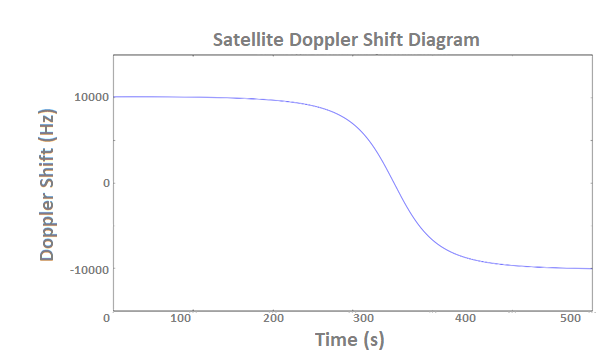

##### Doppler Shift Compensation
•	Adjust center frequency tuning of either transmitter or receiver based on predicted doppler shift predetermined by satellite orbital path trajectory

•	Oversample down-converted doppler shifted RF signal to encompass whole bandwidth of predicted doppler shift and compensate 
for doppler shift digitally. This requires a receiver with larger bandwidth compared to the actual baseband signal. 

•	Implement a frequency tracking phased locked loop which locks on to carrier signal and automatically tunes to received signal center frequency

•	Utilize software to detect center frequency offset of received signal and retune the receiver accordingly 


## Receiver

#### Antenna

Receiver Antenna Gain is the peak gain of the eggbeater antenna, which is calculated through electromagnetic modeling and/or testing at the signal frequency. This value was determined through research and extended knowledge from known values of existing eggbeater antennae.

The Received Power = Transmit EIRP + Downlink Path Loss + Polarization Loss + Atmospheric Losses + Receiver Antenna Gain + Receiver Pointing Losses.

$$P_{Re}[dBm] = EIRP[dB] + L_{Path} [dB]+ L_{Pol}[dB] + L_{At} [dB]+ G_{Re}[dB] + L_{ReP}[dB] $$

#### Amplification

If the desired antenna does not have sufficient gain to achieve the desired Eb/No value, a Low Noise Amplifier (LNA) can be used to increase signal strength. Adding a LNA close to the antenna will amplify the signal without generating too much additional noise, but is important that the LNA be built with as low a noise figure as possible.

#### Radio

To interpret the radio frequency signal as data, a hardware or software radio may be used. Software radios are ever growing in popularity and can be purchased for reasonably low prices. Software radios can be configured to decode a range of frequencies and modulation schemes on the fly -- making them an excellent purchase for use in varying radio frequency projects. Hardware radios are better at accomplishing specific tasks and may be cheaper overall, but their functionality is limited.

## Solve for Link Margin

Now that all the bits and pieces have been solved for, plug them back into the equations listed at the beginning of the document to solve for the Link Margin.

$$MDS[dB] = -174 + 10log_{10}(BW[kHz]*1000) + N_{Sys}[dB]$$

$$P_{Re}[dB] = {EIRP}[dB] + L_{Path}[dB] + L_{Pol}[dB] + L_{At}[dB] + G_{Re}[dB] + L_{ReP}[dB]$$

$$ {Eb/No}_F[dB] = {P_{Re}}[dB] -{MDS}[dB]$$

$${Eb/No}_R[dB] = {Eb/No}_T[dB] + {L_{TrImp}}[dB]$$

$$Link_{Mar}[dB] = {{Eb/No}_F}[dB] - {{Eb/No}_R}[dB]$$

## Example Problem

Ground Sphere Mk 3 is a ground station node that will receive APT data from NOAA weather satellites and reproduce an image taken by the satellite as it orbits overhead. By using the methods detailed throughout this document, a final link margin value can be found. In theory, if this value is positive, the system with the given inputs will be able to decode an APT transmission from a NOAA satellite. If the value is negative, the system may fail to decode the signal.

For the Ground Sphere Mk 3, we are able to determine all values necessary to compute the final link margin. It is important to note that these calculations are valid for our particular setup, but may not be for others with different systems. This example is valid for average weather conditions, average orbital inclinations, average solar activity, etc. Conditions outside of the average may result in different values, but this is inherently an unavoidable issue in link budget calculation. Below is an example for an average input case for our system.

|Inputs|
|---|---|---|
|Parameter|	Value|	Unit|
|Ground Station Altitude| 400 |m|
|Satellite Orbital Altitude| 860 | km |
|Orbit Elevation Angle| 25 | deg |
|Downlink Frequency|137.5|MHz|
|Target Eb/No|20.00|dB|
|Implementation Loss|1.00|dB|
|Transmit Power|5.0|W|
|Transmit Losses|-1.0|dB|
|Transmit Antenna Gain|4.00|dB|
|TX Pointing Losses|-3.0|dB|
|Polarization Loss|0.0|dB|
|Atmosphere Losses|-1.1|dB|
|Receive Antenna Gain|5.4|dB|
|RX Pointing Losses|-3.0|dB|
|System Noise Figure|5.0|dB|
|Noise Bandwidth|34.0|kHz|

|Intermediates|
|---|---|---|
|Downlink Wavelength|2.180309|m|
|Link Distance|1677.2|km|
|Required Eb/No|21.00|dB|
|Transmit Power|37.0|dBm|
|Transmit EIRP|37.0|dBm|
|Downlink Path Loss|-139.7|dB|

The Target Eb/No for NOAA Automatic Picture Transmission (APT) reception is typically around 20 - 25 dB, however it varies based on communication scheme (e.g. modulation, forward error correction, coding schemes, etc.).

The receiver values correspond to a sea-level Ground Sphere Mk3 node on the Eastern seaboard of the United States. Transmitter values were taken from NOAA-19 APT transmission data sheets. Most NOAA weather satellites are in a highly inclined (polar) orbit, so location on the globe should not influence the value significantly, although differences in altitude could vary the link distance, thereby adjusting the path loss by measurable values.

Once all values are accurately found for the system, using the equations to find link margin are relatively straightforward. Because most values are in the log scale, addition can be used to calculate a final link margin for the system.

#### Minimum Detectable Signal
First, calculate the minimum detectable signal using the bandwidth and system noise values. This value (in dBm) is the lowest received signal power the receiver is capable of distinguishing from noise.

$$MDS[dBm] = -174 + 10log_{10}(BW[kHz]*1000) + N_{Sys}[dB]$$
$$MDS[dBm] = -174 + 10log_{10}(34 * 1000) + 5$$
$$MDS[dBm] = -174 + 45.3148 + 5$$
$$MDS[dBm] = -123.6852$$

#### Received Power
Now, using the transmit and signal propogation values, an approximate value for average received power can be found. This more or less estimates the signal power at the terminals of the receiver during a transmission.

$$P_{Re}[dBm] = {EIRP}[dB] + L_{Path}[dB] + L_{Pol}[dB] + L_{At}[dB] + G_{Re}[dB] + L_{ReP}[dB]$$
$$P_{Re}[dBm] = 37.0 - 139.7 - 0.0 - 1.1 + 5.4 - 3.0$$
$$P_{Re}[dBm] = -101.4$$

#### Energy Per Bit
In order to effectively interpret the signal data, a sufficient energy per bit must be met. Calculating the target Eb/No and the estimated Eb/No enables the final link margin to be performed.

$${Eb/No}_F[dB] = {P_{Re}}[dB] -{MDS}[dB]$$
$${Eb/No}_F[dB] = -101.4 + 123.7$$
$${Eb/No}_F[dB] = 22.3$$

$${Eb/No}_R[dB] = {Eb/No}_T[dB] + {L_{TrImp}}[dB]$$
$${Eb/No}_R[dB] = 20.0 + 1.0$$
$${Eb/No}_R[dB] = 21.0$$

#### Link Margin
Link margin estimates the expected performance for decoding the signal. There are many assumptions in this basic calculation, but overall a positive value is a good sign that the signal will be decodable.

$$Link_{Mar}[dB] = {{Eb/No}_F}[dB] - {{Eb/No}_R}[dB]$$
$$Link_{Mar}[dB] = 22.3 - 21.0$$
$$Link_{Mar}[dB] = 1.3$$

The final results are shown in the table below.

|Results|
|---|---|---|
|Received Power|-101.4|dBm|
|MDS|-123.7|dBm|
|Eb/No|22.3|dB|
|Link Margin|1.3|dB|

## Test Cases

In the tables below, various combinations of input variables are shown. These test cases have been created to validate the python software for this project, as well as to show the results of different input combinations in the Ground Sphere Mk 3 project. Below the tables, a description about the each test case will explain the input values clearly.

|Inputs[units]|Case 1|Case 2|
|--|--|--|
|Ground Station Altitude[m]| 400 | x |
|Satellite Orbital Altitude[km]| 860 | x |
|Orbit Elevation Angle[deg]| 25 | x |
|Downlink Frequency[MHz]|137.5|436.5|
|Target Eb/No[dB]|20.00|18|
|Implementation Loss[dB]|1.00|1.00|
|Transmit Power[W]|5.0|2.0|
|Transmit Losses[dB]|-1.0|-3.1|
|Transmit Antenna Gain[dB]|4.00|2.15|
|TX Pointing Losses[dB]|-3.0|-2.0|
|Polarization Loss[dB]|0.0|-3.0|
|Atmosphere Losses[dB]|-1.1|-2.1|
|Receive Antenna Gain[dB]|5.4|17.9|
|RX Pointing Losses[dB]|-3.0|-1.0|
|System Noise Figure[dB]|5.0|3.2|
|Noise Bandwidth[kHz]|34.0|20.0|

|Intermediates[units]|Case 1|Case 2|
|---|---|--|
|Downlink Wavelength[m]|2.180309|.686810|
|Link Distance[km]|1677.2|1800.0|
|Required Eb/No[dB]|21.00|19.00|
|Transmit Power[dBm]|37.0|33.0|
|Transmit EIRP[dBm]|37.0|30.1|
|Downlink Path Loss[dB]|-139.7|-150.4|

|Outputs[units]|Case 1|Case 2|
|---|---|---|
|Received Power[dBm]|-101.4|-108.5|
|MDS[dBm]|-123.7|-127.8|
|Eb/No[dB]|22.3|19.3|
|Link Margin[dB]|1.3|0.3|

##### Case 1 ##### 
Case 1 is the "Example Problem" worked out in the section above. The "Example Problem" section describes the input values in greater detail. This case uses the Ground Sphere Mk 3 expected system values for NOAA weather satellites broadcasting APT data.

The purpose of this test case is to verify the Ground Sphere Mk 3 node will sufficiently decode data in average conditions. This link budget will be the primary reference for Ground Sphere Mk 3 operations given average conditions. 

##### Case 2
Case 2 is another link budget that is reasonable for a working GMSK link.